# Case Study - Wine Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report analyses the [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) from UCI Machine Learning Lab. This includes two datasets related to red and white vinho verde wine samples, from the north of Portugal.
>
> The main goal is to ***investigate what chemical characteristics are most important in predicting wine quality***. 

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Magic commands
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

> The data is divided between two csv files, one for red wine and the other for white wine. First I will load each file into a DataFrame.

In [2]:
# Load red and white wine datasets
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
# High-level overview of red dataframes
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# High-level overview of white dataframes
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


> To combine the two DataFrames, I will add an additional column (color) for each one of them. 

In [5]:
# create color array for red dataframe
color_red = np.repeat('red', len(red_df))
red_df['color'] = color_red
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
# create color array for white dataframe
color_white = np.repeat('white', len(white_df))
white_df['color'] = color_white
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


> Now to combine the two DataFrames using `concat` method.

In [7]:
# concat dataframes
wine_df = pd.concat([red_df, white_df], ignore_index=True)

### Data Cleaning

In [8]:
# Check the new Dataframe. Why there is a new column with NaN values?
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color,total_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,NaN


In [9]:
# Check the new column in the white portion.
wine_df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color,total_sulfur_dioxide
6492,6.2,0.21,0.29,1.6,0.039,24.0,NaN,0.99114,3.27,0.50,11.2,6,white,92.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,NaN,0.99490,3.15,0.46,9.6,5,white,168.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,NaN,0.99254,2.99,0.46,9.4,6,white,111.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,NaN,0.98869,3.34,0.38,12.8,7,white,110.0
6496,6.0,0.21,0.38,0.8,0.020,22.0,NaN,0.98941,3.26,0.32,11.8,6,white,98.0


> There is a problem with `total_sulfur_dioxid` column when concatanating the two DataFrames. After more investigation turns out that the two columns names don't match. I will rename the columns and repeate the concatenation.

In [10]:
# Correct column name in the red DataFrame
red_df.rename(columns = {'total_sulfur-dioxide':'total_sulfur_dioxide'}, inplace=True)

In [11]:
# Reconcat dataframes
wine_df = pd.concat([red_df, white_df], ignore_index=True)

> Now the data is ready to be explored.

In [12]:
# High-level overview of the new DataFrame
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [13]:
print('\033[1m Shape:\033[0m\n{}'.format(wine_df.shape))
print()
print('\033[1m Info:\033[0m')
print(wine_df.info())

 Shape:
(6497, 13)

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


#### Check for Null and Duplicated Values.

In [14]:
# Check for NaN values
wine_df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

> There are no null values in the DataFrame.

In [15]:
# Check for duplicates
wine_df.duplicated().sum()

1177

> Too many duplicates. Need further investigation.

In [16]:
# Create masks according to color values
red = wine_df.color == 'red'
white = wine_df.color == 'white'

In [17]:
# Check for duplicates in the red and white wine data
print('Red wine duplicates', wine_df[red].duplicated().sum())
print('White wine duplicates', wine_df[white].duplicated().sum())

Red wine duplicates 240
White wine duplicates 937


In [18]:
# What is the duplicates ratio for each category
print('Red wine duplicates ratio', wine_df[red].duplicated().sum()/wine_df[red].shape[0])
print('White wine duplicates ratio', wine_df[white].duplicated().sum()/wine_df[white].shape[0])

Red wine duplicates ratio 0.150093808630394
White wine duplicates ratio 0.19130257247856267


> This 15% for red wine data, and 19% for white wine. This is acceptable to drop for the current study.

In [19]:
# Drop all duplicated values
wine_df.drop_duplicates(inplace=True, ignore_index=True)

In [20]:
# Recheck for duplicates
wine_df.duplicated().sum()

0

#### Check for Outliers.

In [21]:
wine_df.describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99]).round(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5320.000,5320.000,5320.000,5320.000,5320.000,5320.000,5320.000,5320.000,5320.000,5320.000,5320.000,5320.000
mean,7.215,0.344,0.318,5.048,0.057,30.037,114.109,0.995,3.225,0.533,10.549,5.796
std,1.320,0.168,0.147,4.500,0.037,17.805,56.774,0.003,0.160,0.150,1.186,0.880
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.240,1.800,0.038,16.000,74.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.300,0.310,2.700,0.047,28.000,116.000,0.995,3.210,0.510,10.400,6.000
75%,7.700,0.410,0.400,7.500,0.066,41.000,153.250,0.997,3.330,0.600,11.400,6.000
95%,9.800,0.680,0.560,14.400,0.104,61.000,206.000,0.999,3.500,0.791,12.700,7.000
99%,12.000,0.889,0.740,18.150,0.200,76.000,240.000,1.001,3.650,1.020,13.400,8.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


> Some features have noticable outliers, however I do not consider them extreme since they may represent special varieties of wine. My decision is to keep the dataset intact.

In [22]:
# Final review of data shape and info
print('\033[1m Shape:\033[0m\n{}'.format(wine_df.shape))
print()
print('\033[1m Info:\033[0m')
print(wine_df.info())

 Shape:
(5320, 13)

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5320 non-null   float64
 1   volatile_acidity      5320 non-null   float64
 2   citric_acid           5320 non-null   float64
 3   residual_sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free_sulfur_dioxide   5320 non-null   float64
 6   total_sulfur_dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color                 5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB
None


<a id='eda'></a>
## Exploratory Data Analysis

### Dataset Structure
There are 5320 datapoints with 13 features:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality (score between 0 and 10)
- color (red or white)

`quality` variable is an integer, `color` is a string, and rest of the variables are floats.

### Statistical Summary

In [23]:
# Describtive statistics for the whole dataset
print('\033[1m Statistical Summary\r\n\033[0m')
wine_df.describe()

 Statistical Summary



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [24]:
# Describtive statistics for red wine data
print('\033[1m Statistical Summary (Red)\r\n\033[0m')
wine_df[red].describe()

 Statistical Summary (Red)



C:\Users\moame\AppData\Local\Temp\ipykernel_29320\2738907084.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wine_df[red].describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.000000
mean,8.093246,0.493605,0.282658,3.119199,0.082380,19.017511,61.718574,0.996362,3.29364,0.631607,10.386314,5.633521
std,1.708820,0.194013,0.188150,2.757141,0.048418,13.772354,50.189293,0.002177,0.15829,0.174535,1.088199,0.839141
min,4.600000,0.115000,0.000000,0.800000,0.012000,1.000000,6.000000,0.989200,2.74000,0.270000,8.400000,3.000000
25%,6.900000,0.340000,0.120000,1.900000,0.063000,8.000000,24.000000,0.995215,3.19000,0.530000,9.500000,5.000000
50%,7.700000,0.480000,0.280000,2.200000,0.076000,15.000000,45.000000,0.996520,3.30000,0.600000,10.100000,6.000000
75%,9.000000,0.620000,0.420000,2.800000,0.088000,26.000000,86.000000,0.997700,3.39000,0.700000,11.100000,6.000000
max,15.900000,1.580000,1.000000,22.000000,0.611000,81.000000,289.000000,1.003690,4.01000,2.000000,14.900000,8.000000


In [25]:
# Describtive statistics for white wine data
print('\033[1m Statistical Summary (White)\r\n\033[0m')
wine_df[white].describe()

 Statistical Summary (White)



C:\Users\moame\AppData\Local\Temp\ipykernel_29320\951212786.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wine_df[white].describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3721.000000,3721.000000,3721.000000,3721.000000,3721.00000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000,3721.000000
mean,6.837853,0.279897,0.333894,5.877533,0.04565,34.771836,136.622413,0.993750,3.195023,0.491137,10.619255,5.865359
std,0.872878,0.102833,0.122341,4.837728,0.02303,17.239125,42.894668,0.002913,0.151956,0.114207,1.219007,0.887722
min,3.800000,0.080000,0.000000,0.600000,0.00900,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.03500,23.000000,106.000000,0.991600,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.04200,33.000000,132.000000,0.993400,3.180000,0.480000,10.500000,6.000000
75%,7.300000,0.330000,0.380000,8.800000,0.05000,45.000000,166.000000,0.995640,3.290000,0.550000,11.500000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.34600,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Exploratory Visualization

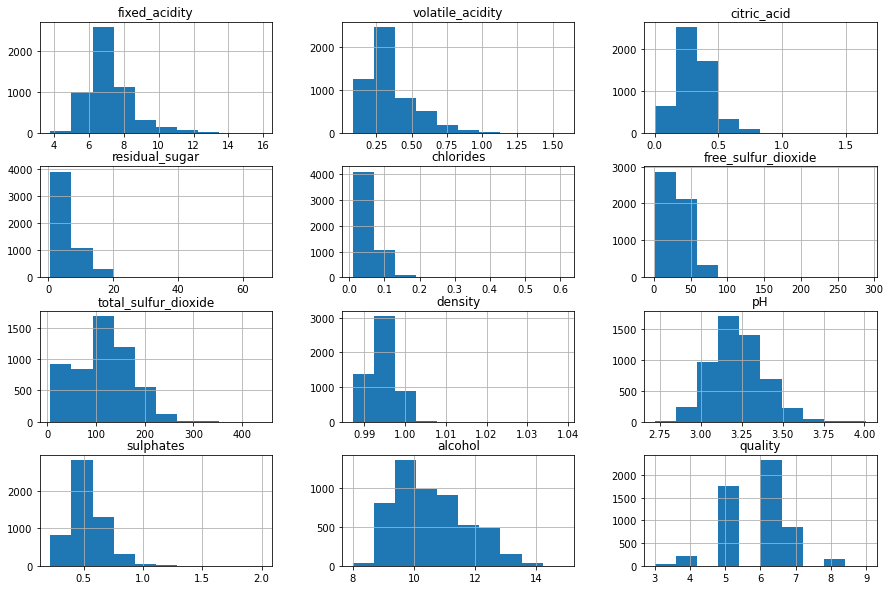

In [26]:
# Histograms for numerical features
wine_df.hist(figsize=(15,10));

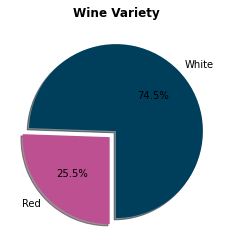

In [27]:
# data destribution between red and white wine (pir chart)
plt.pie(wine_df['color'].value_counts(), labels = ['White', 'Red'], colors=['#003f5c', '#bc5090'], 
        startangle=270, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')
# plot title
plt.title('Wine Variety', fontweight="bold")
# showing the plot
plt.show()

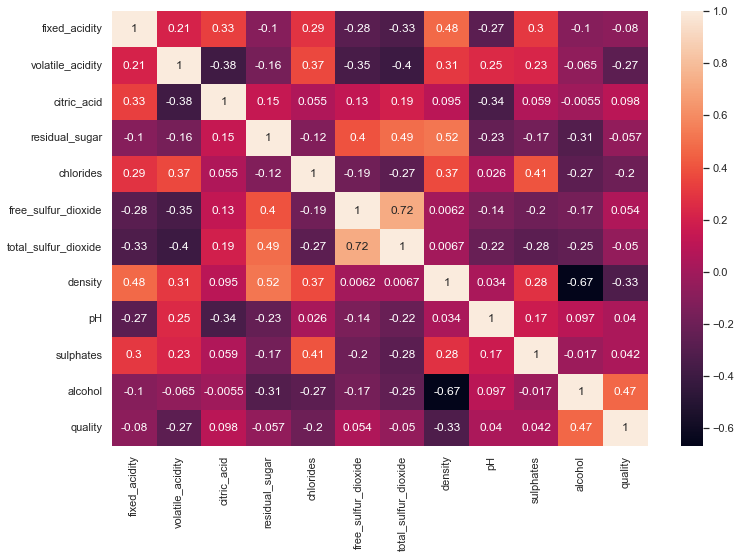

In [28]:
# Heat map
corrMatrix = wine_df.corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Research Question 1: Do wines with higher alcoholic content receive better ratings?

> First, lets check `alcoho` distribution

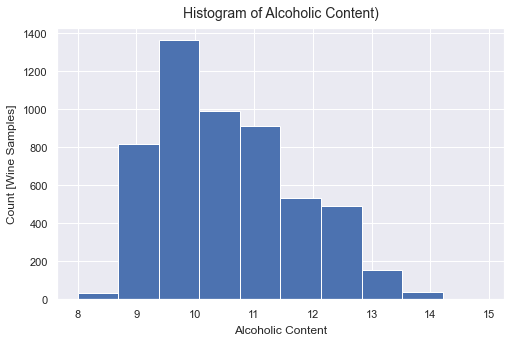

In [29]:
# Plot a histogram of the "alcohol" column
plt.figure(figsize=[8, 5])
plt.hist(data = wine_df, x = 'alcohol');
plt.title('Histogram of Alcoholic Content)', fontsize=14, y=1.015)
plt.xlabel('Alcoholic Content', labelpad=6, fontsize=12)
plt.ylabel('Count [Wine Samples]', labelpad=6, fontsize=12)
plt.show()

> `alcohol` has a skewed distribution, thus I am using the median to measure the center.

In [30]:
# Calculate the median for alcohol feature
wine_df.alcohol.median()

10.4

In [31]:
# Spliting the data into low and high alcohol groups
# You have two options to execute the query
low_alcohol = wine_df.query('alcohol < 10.4')
high_alcohol = wine_df.query('alcohol >= @wine_df.alcohol.median()')

In [32]:
# Ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [33]:
# Calculate mean quality rating for the low alcohol and high alcohol groups
print('\033[1m Low Alcohol Quality Mean\r\n\033[0m', low_alcohol.quality.mean())
print('\033[1m High Alcohol Quality Mean\r\n\033[0m', high_alcohol.quality.mean()) 

 Low Alcohol Quality Mean
 5.439202148062908
 High Alcohol Quality Mean
 6.138223368964246


> There seems to be a significant effect. I will assert that with visuals

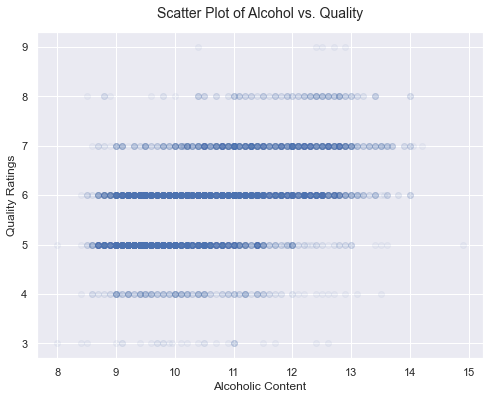

In [34]:
# Scatter plot of alcohol vs. quality
plt.figure(figsize = [8, 6])
plt.scatter(data = wine_df, x ='alcohol' , y = 'quality', alpha = 1/20)
plt.title('Scatter Plot of Alcohol vs. Quality', fontsize=14, y=1.025)
plt.xlabel('Alcoholic Content')
plt.ylabel('Quality Ratings')
plt.show()

### Research Question 2: Do Sweeter Wines Receive Better Ratings

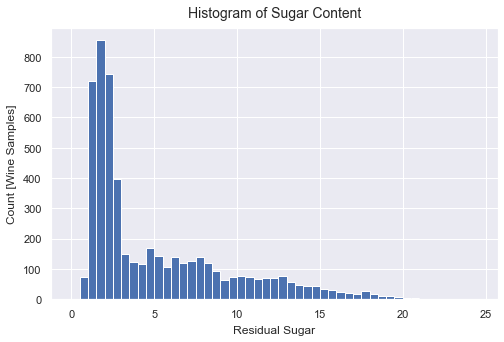

In [35]:
# Plot a histogram of the 'residual_sugar' column
plt.figure(figsize=[8, 5])
bins = np.arange(0, 25, 0.5)
plt.hist(data = wine_df, x = 'residual_sugar', bins=bins);
plt.title('Histogram of Sugar Content', fontsize=14, y=1.015)
plt.xlabel('Residual Sugar', labelpad=6, fontsize=12)
plt.ylabel('Count [Wine Samples]', labelpad=6, fontsize=12)
plt.show()

> The `residual_sugar` distribution is right-skewed.

In [36]:
# Calculate the median amount of residual sugar
wine_df.residual_sugar.median()

2.7

In [37]:
# Spliting the data into low and high sugar groups
# Using advanced query techniques
low_sugar = wine_df.query('residual_sugar < @wine_df.residual_sugar.median()')
high_sugar = wine_df.query('residual_sugar >= @wine_df.residual_sugar.median()')

In [38]:
# Ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [39]:
# Calculate mean quality rating for the low sugar and high sugar groups
print('\033[1m Low Sugar Quality Mean\r\n\033[0m', low_sugar.quality.mean())
print('\033[1m High Sugar Quality Mean\r\n\033[0m', high_sugar.quality.mean()) 

 Low Sugar Quality Mean
 5.78316032295271
 High Sugar Quality Mean
 5.807649871276205


> No significant effect. I will assert that with visuals

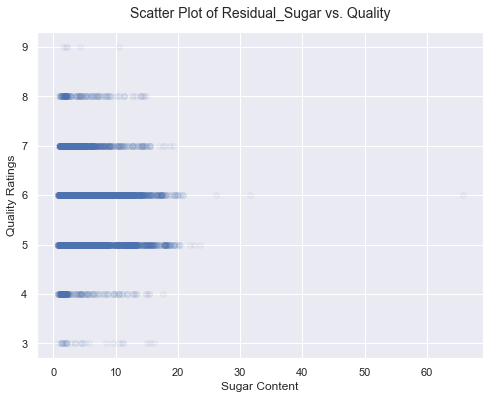

In [40]:
# Scatter plot of residual_sugar vs. quality
plt.figure(figsize = [8, 6])
plt.scatter(data = wine_df, x ='residual_sugar' , y = 'quality', alpha = 1/20)
plt.title('Scatter Plot of Residual_Sugar vs. Quality', fontsize=14, y=1.025)
plt.xlabel('Sugar Content')
plt.ylabel('Quality Ratings')
plt.show()

### Research Question 3: Do Red Wines Receive Better Ratings Than White Wines?

In [41]:
# Calculate median quality rating for the low alcohol and high alcohol groups
print('\033[1m Red Wines Quality Mean\r\n\033[0m', wine_df[red].quality.mean())
print('\033[1m White Wines Quality Mean\r\n\033[0m', wine_df[white].quality.mean()) 

 Red Wines Quality Mean
 5.6335209505941215
 White Wines Quality Mean
 5.865358774522978


C:\Users\moame\AppData\Local\Temp\ipykernel_29320\2105198620.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('\033 Red Wines Quality Mean\r\n\033', wine_df[red].quality.mean())
C:\Users\moame\AppData\Local\Temp\ipykernel_29320\2105198620.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('\033 White Wines Quality Mean\r\n\033', wine_df[white].quality.mean())


<a id='conclusions'></a>
## Conclusions

> This report examined a dataset of chemical properities and preceived quality of red and white wines samples. The aim is trying to figure out what are the factors that correlates with wine quality ratings.

> It found that the most important factor was the amount of alcohol in the wine sample. This factor was positivelt correlated with quality ratings, meaning that wine samples with higher the alcoholic content tend to receive better quality ratings.

> The report also explored the effect of sugar contents and the wine variety (red - white) on quality ratings, there was no evidence that either of these factors had significant effect.